# Desafio 1: Análise da dinâmica temporal e geográfica dos preços de combustíveis no Brasil

Neste projeto, realizo uma **análise exploratória dos preços de combustíveis no Brasil com base em dados públicos da ANP**.

O **objetivo** é **identificar padrões temporais, diferenças regionais e aspectos amostrais** que influenciam a interpretação dos preços, utilizando visualizações e estatísticas descritivas para apoiar as conclusões.

## Dataset

O **dataset** reúne **dados semanais de preços de combustíveis** no **Brasil**, coletados pela **ANP** (Agência Nacional de Petróleo, Gás Natural e Biocombustíveis) **entre 2004 e 2021**.

Ele inclui informações de preços médios, mínimos e máximos, número de postos pesquisados e dados geográficos por UF e região, permitindo análises temporais e comparações regionais dos preços praticados no país.

### Carregando o dataset


Para execução no Google Colab, basta fazer o upload do notebook e do arquivo de dados.

O notebook organiza automaticamente a estrutura de pastas necessária.

In [ ]:
import os
import shutil

DATA_FILE = '2004-2021.tsv'
DATA_DIR = 'data'
DATA_PATH = f'{DATA_DIR}/{DATA_FILE}'


# Cria a pasta data, caso ela não exista.
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

# Move o arquivo do dataset para a pasta data
if os.path.exists(DATA_FILE) and not os.path.exists(DATA_PATH):
    shutil.move(DATA_FILE, DATA_PATH)


In [ ]:
import pandas as pd

df = pd.read_csv(DATA_PATH, sep="\t")
df.head()


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


** Análise da Qualidade dos Dados **

In [ ]:
df.shape

(120823, 18)

In [ ]:
df.isna().sum()

,0
DATA INICIAL,0
DATA FINAL,0
REGIÃO,0
ESTADO,0
PRODUTO,0
NÚMERO DE POSTOS PESQUISADOS,0
UNIDADE DE MEDIDA,0
PREÇO MÉDIO REVENDA,0
DESVIO PADRÃO REVENDA,0
PREÇO MÍNIMO REVENDA,0


#### Verificando duplicatas

In [ ]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

O dataset contém 120.823 observações e 18 variáveis, representando séries históricas agregadas de preços de combustíveis no Brasil.

Não foram identificados valores ausentes no dataset, indicando alta integridade no processo de coleta e consolidação dos dados.

#### Padronizando os nomes das colunas

In [10]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.normalize('NFKD')
      .str.encode('ascii', errors='ignore')
      .str.decode('utf-8')
)
df.columns

Index(['data_inicial', 'data_final', 'regiao', 'estado', 'produto',
       'numero_de_postos_pesquisados', 'unidade_de_medida',
       'preco_medio_revenda', 'desvio_padrao_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda', 'margem_media_revenda',
       'coef_de_variacao_revenda', 'preco_medio_distribuicao',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao', 'coef_de_variacao_distribuicao'],
      dtype='object')

#### Validando e corrigindo os tipos dos dados

Apesar de não haver valores nulos explícitos, algumas colunas numéricas foram carregadas como object, indicando a presença de inconsistências de formatação que exigem tratamento adicional.

Colunas numéricas carregadas como **_object_** :
*   margem_media_revenda
*   preco_medio_distribuicao
*   desvio_padrao_distribuicao
*   preco_minimo_distribuicao
*   preco_maximo_distribuicao
*   coef_de_variacao_distribuicao




In [39]:
df[['margem_media_revenda', 'preco_medio_distribuicao', 'desvio_padrao_distribuicao',
     'preco_minimo_distribuicao', 'preco_maximo_distribuicao', 'coef_de_variacao_distribuicao']].sample(10)


,margem_media_revenda,preco_medio_distribuicao,desvio_padrao_distribuicao,preco_minimo_distribuicao,preco_maximo_distribuicao,coef_de_variacao_distribuicao
21715,0.56,2.601,0.103,2.3773,2.75,0.04
38952,0.471,0.999,0.281,0.8305,1.6,0.281
77243,-,-,-,-,-,-
75141,0.478,2.09,0.099,1.7549,2.3442,0.047
116536,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
40533,0.468,1.231,0.11,1.0379,1.4215,0.089
94028,0.888,1.965,0,1.965,1.965,0
63006,0.385,2.661,0.042,2.569,2.719,0.016
19286,0.427,2.244,0.072,2.1903,2.4165,0.032
96369,0.267,3.086,0.086,2.936,3.3171,0.028


A análise das colunas mostrou a presença de valores **'-99999.0'** e marcadores textuais como **'-'**, normalmente utilizados para representar ausência de dados, o que exige tratamento específico antes da análise.

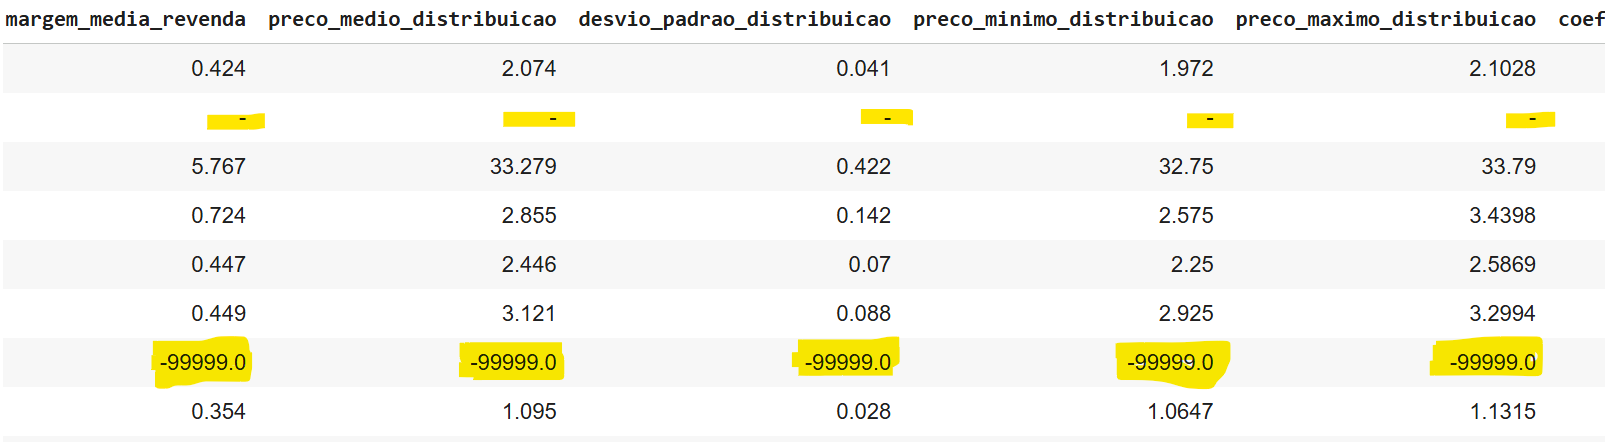

#### Substituindo valores inválidos por NaN

In [40]:
import numpy as np

cols_dist = [
    'margem_media_revenda', 'preco_medio_distribuicao', 'desvio_padrao_distribuicao',
    'preco_minimo_distribuicao', 'preco_maximo_distribuicao', 'coef_de_variacao_distribuicao'
]

for col in cols_dist:
    df[col] = df[col].replace('-99999.0', np.nan)
    df[col] = df[col].replace('-', np.nan)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   data_inicial                   120823 non-null  object 
 1   data_final                     120823 non-null  object 
 2   regiao                         120823 non-null  object 
 3   estado                         120823 non-null  object 
 4   produto                        120823 non-null  object 
 5   numero_de_postos_pesquisados   120823 non-null  int64  
 6   unidade_de_medida              120823 non-null  object 
 7   preco_medio_revenda            120823 non-null  float64
 8   desvio_padrao_revenda          120823 non-null  float64
 9   preco_minimo_revenda           120823 non-null  float64
 10  preco_maximo_revenda           120823 non-null  float64
 11  margem_media_revenda           111875 non-null  object 
 12  coef_de_variacao_revenda      

#### Convertendo valores válidos para numérico

In [42]:
for col in cols_dist:
    # coerce transforma o valor em NaN, caso ela não possa ser convertido para numérico.
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   data_inicial                   120823 non-null  object 
 1   data_final                     120823 non-null  object 
 2   regiao                         120823 non-null  object 
 3   estado                         120823 non-null  object 
 4   produto                        120823 non-null  object 
 5   numero_de_postos_pesquisados   120823 non-null  int64  
 6   unidade_de_medida              120823 non-null  object 
 7   preco_medio_revenda            120823 non-null  float64
 8   desvio_padrao_revenda          120823 non-null  float64
 9   preco_minimo_revenda           120823 non-null  float64
 10  preco_maximo_revenda           120823 non-null  float64
 11  margem_media_revenda           111875 non-null  float64
 12  coef_de_variacao_revenda      

In [43]:
df[cols_dist].isna().sum()

,0
margem_media_revenda,8948
preco_medio_distribuicao,8908
desvio_padrao_distribuicao,8908
preco_minimo_distribuicao,8908
preco_maximo_distribuicao,8908
coef_de_variacao_distribuicao,8908


#### Convertendo os campos de data para datetime

In [44]:
df['data_inicial'] = pd.to_datetime(df['data_inicial'])
df['data_final'] = pd.to_datetime(df['data_final'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   data_inicial                   120823 non-null  datetime64[ns]
 1   data_final                     120823 non-null  datetime64[ns]
 2   regiao                         120823 non-null  object        
 3   estado                         120823 non-null  object        
 4   produto                        120823 non-null  object        
 5   numero_de_postos_pesquisados   120823 non-null  int64         
 6   unidade_de_medida              120823 non-null  object        
 7   preco_medio_revenda            120823 non-null  float64       
 8   desvio_padrao_revenda          120823 non-null  float64       
 9   preco_minimo_revenda           120823 non-null  float64       
 10  preco_maximo_revenda           120823 non-null  float64       
 11  

In [45]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
numero_de_postos_pesquisados,120823.0,221.066461,387.940239,1.0000,39.00000,99.0000,226.00000,4167.000
preco_medio_revenda,120823.0,11.473440,19.161823,0.7660,2.15700,2.8990,4.02600,107.500
desvio_padrao_revenda,120823.0,0.684132,1.403317,0.0000,0.07500,0.1210,0.20400,10.748
preco_minimo_revenda,120823.0,9.977821,16.433783,0.5900,1.98900,2.6900,3.79000,100.000
preco_maximo_revenda,120823.0,13.233902,22.451445,0.9990,2.42000,3.2000,4.58900,120.000
margem_media_revenda,111875.0,2.324677,4.591806,0.0010,0.28900,0.3910,0.57700,36.847
coef_de_variacao_revenda,120823.0,0.045298,0.024763,0.0000,0.02900,0.0410,0.05800,0.395
preco_medio_distribuicao,111915.0,8.916643,14.357997,0.5060,1.84300,2.4340,3.43800,83.137
desvio_padrao_distribuicao,111915.0,0.580658,1.304524,0.0000,0.04800,0.0800,0.15600,18.385
preco_minimo_distribuicao,111915.0,7.744055,12.378073,0.3257,1.71160,2.2922,3.27870,83.000


In [46]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
regiao,120823,5,NORDESTE,41671
estado,120823,27,BAHIA,4819
produto,120823,9,GASOLINA COMUM,23570
unidade_de_medida,120823,3,R$/l,82793


#### Análise de Outliers

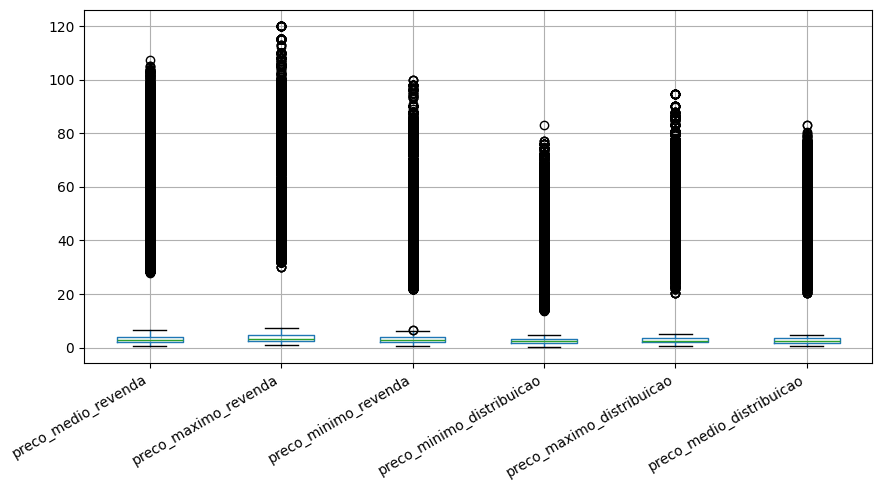

In [47]:
import matplotlib.pyplot as plt

cols_iqr = [
    'preco_medio_revenda', 'preco_maximo_revenda', 'preco_minimo_revenda',
    'preco_minimo_distribuicao', 'preco_maximo_distribuicao', 'preco_medio_distribuicao'
]

#df[cols_iqr].boxplot(figsize=(15, 10))
#plt.show()


plt.figure(figsize=(9, 5))
df[cols_iqr].boxplot()
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


A análise de outliers de forma global mostrou a presença de muitos outliers, devido a diferenças nas escalas de preços dos produtos e também às variações de preços ao longo do período de 2004 a 2021.

Para uma análise mais consistente, os boxplots serão gerados segmentados por produto e por período.

#### Análise por produto

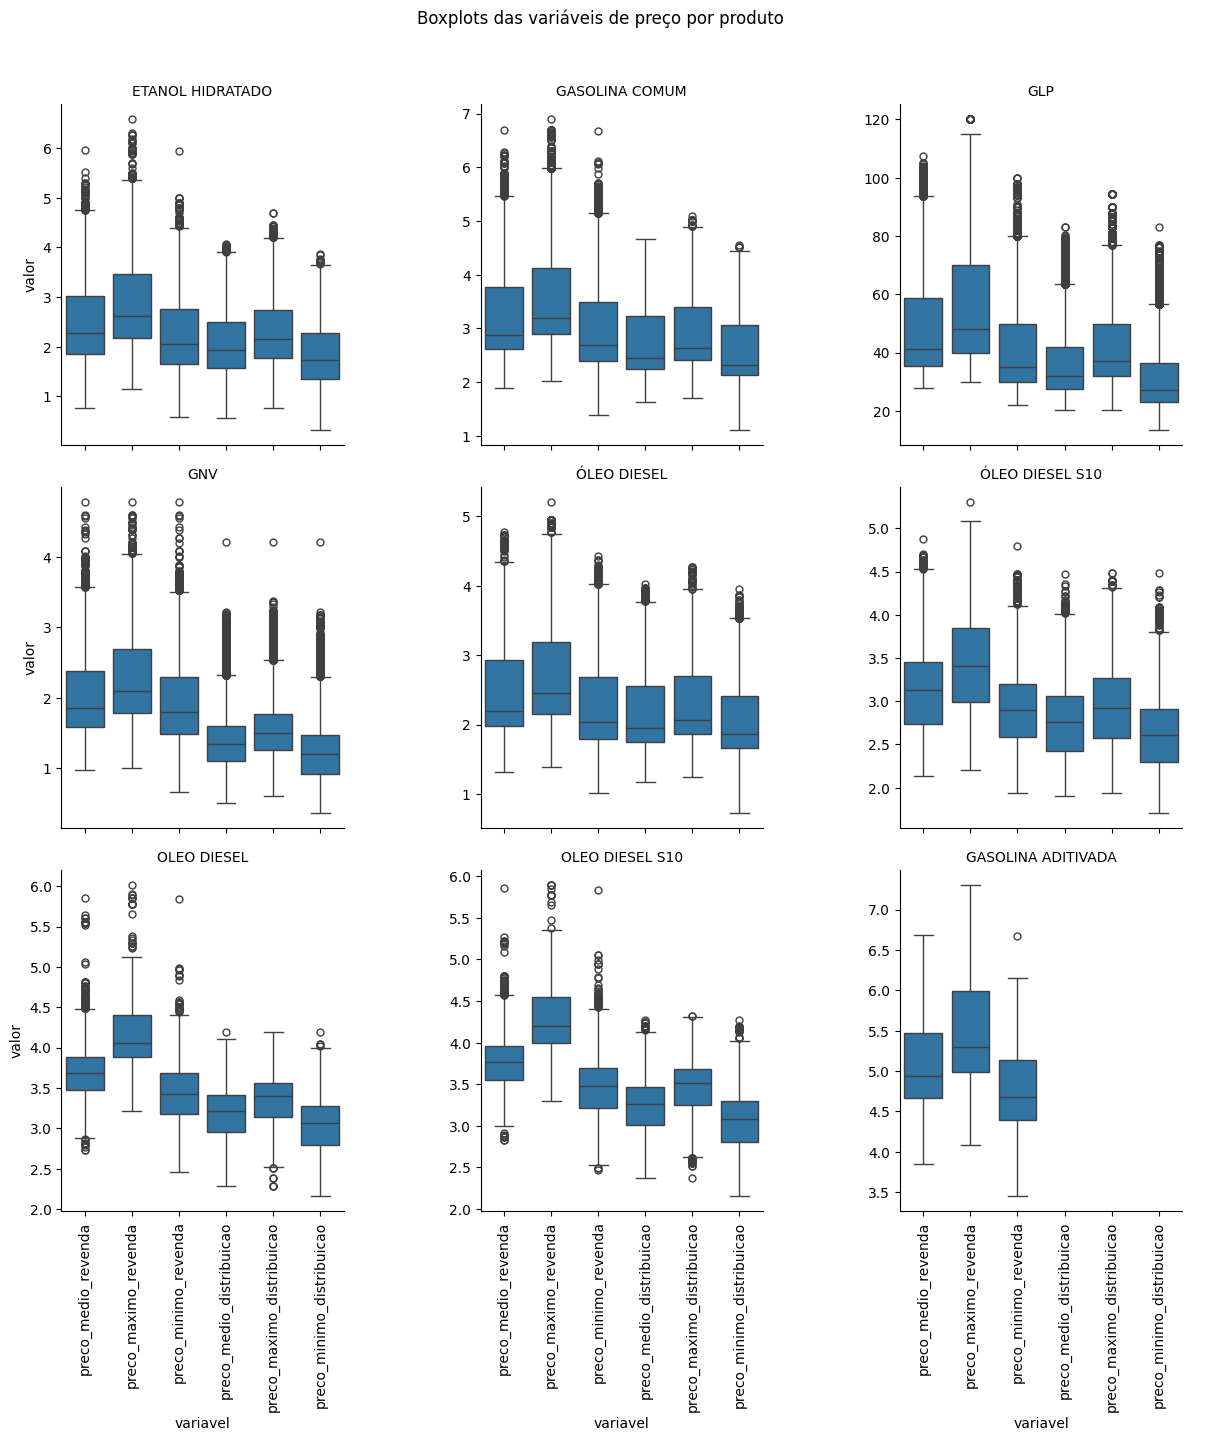

In [48]:
import seaborn as sns

cols_iqr = [
    'preco_medio_revenda', 'preco_maximo_revenda', 'preco_minimo_revenda',
    'preco_medio_distribuicao', 'preco_maximo_distribuicao', 'preco_minimo_distribuicao'
]

df_long_prod = df[cols_iqr + ['produto']].melt(
    id_vars='produto',
    var_name='variavel',
    value_name='valor'
)

g = sns.catplot(
    data=df_long_prod,
    x='variavel',
    y='valor',
    col='produto',
    kind='box',
    col_wrap=3,
    height=4,
    sharey=False
)

g.set_xticklabels(['preco_medio_revenda', 'preco_maximo_revenda', 'preco_minimo_revenda',
    'preco_medio_distribuicao', 'preco_maximo_distribuicao', 'preco_minimo_distribuicao'], rotation=90)
g.set_titles('{col_name}')
g.fig.suptitle('Boxplots das variáveis de preço por produto', y=1.05)

plt.show()

In [51]:
df['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

#### Padronizando os nomes dos produtos

Foi identificada uma problema de padronização nos nomes dos produtos devido a presença ou ausência de acentuação, como por exemplo: ÓLEO DIESEL e OLEO DIESEL, ÓLEO DIESEL S10, e OLEO DIESEL S10, gerando uma duplicação de categorias, o que pode distorcer as análises.

Para corrigir essa duplicação será feita a normalização textual, removendo acentos e padronizando os nomes dos produtos, removendo duplicidades.

In [52]:
import unicodedata

def remover_acentos(texto):
  if isinstance(texto, str):
    return unicodedata.normalize('NFKD', texto)\
    .encode('ASCII', 'ignore')\
    .decode('utf-8')

  return texto

df['produto_normalizado'] = df['produto'].str.upper().apply(remover_acentos).str.strip()

df['produto_normalizado'].unique()


array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'OLEO DIESEL',
       'OLEO DIESEL S10', 'GASOLINA ADITIVADA'], dtype=object)

#### Verificando duplicatas novamente

Após as etapas de limpeza, padronização de categorias e correção de tipos, foi realizada uma nova verificação de duplicatas considerando como chave lógica o período de coleta, a UF e o produto.

Essa etapa é importante pois transformações semânticas podem revelar registros equivalentes que anteriormente não eram detectados como duplicados.

In [54]:
df.columns

Index(['data_inicial', 'data_final', 'regiao', 'estado', 'produto',
       'numero_de_postos_pesquisados', 'unidade_de_medida',
       'preco_medio_revenda', 'desvio_padrao_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda', 'margem_media_revenda',
       'coef_de_variacao_revenda', 'preco_medio_distribuicao',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao', 'coef_de_variacao_distribuicao',
       'produto_normalizado'],
      dtype='object')

In [55]:
df.duplicated(
    subset=['data_inicial','data_final', 'estado', 'produto_normalizado']
).sum()


np.int64(0)

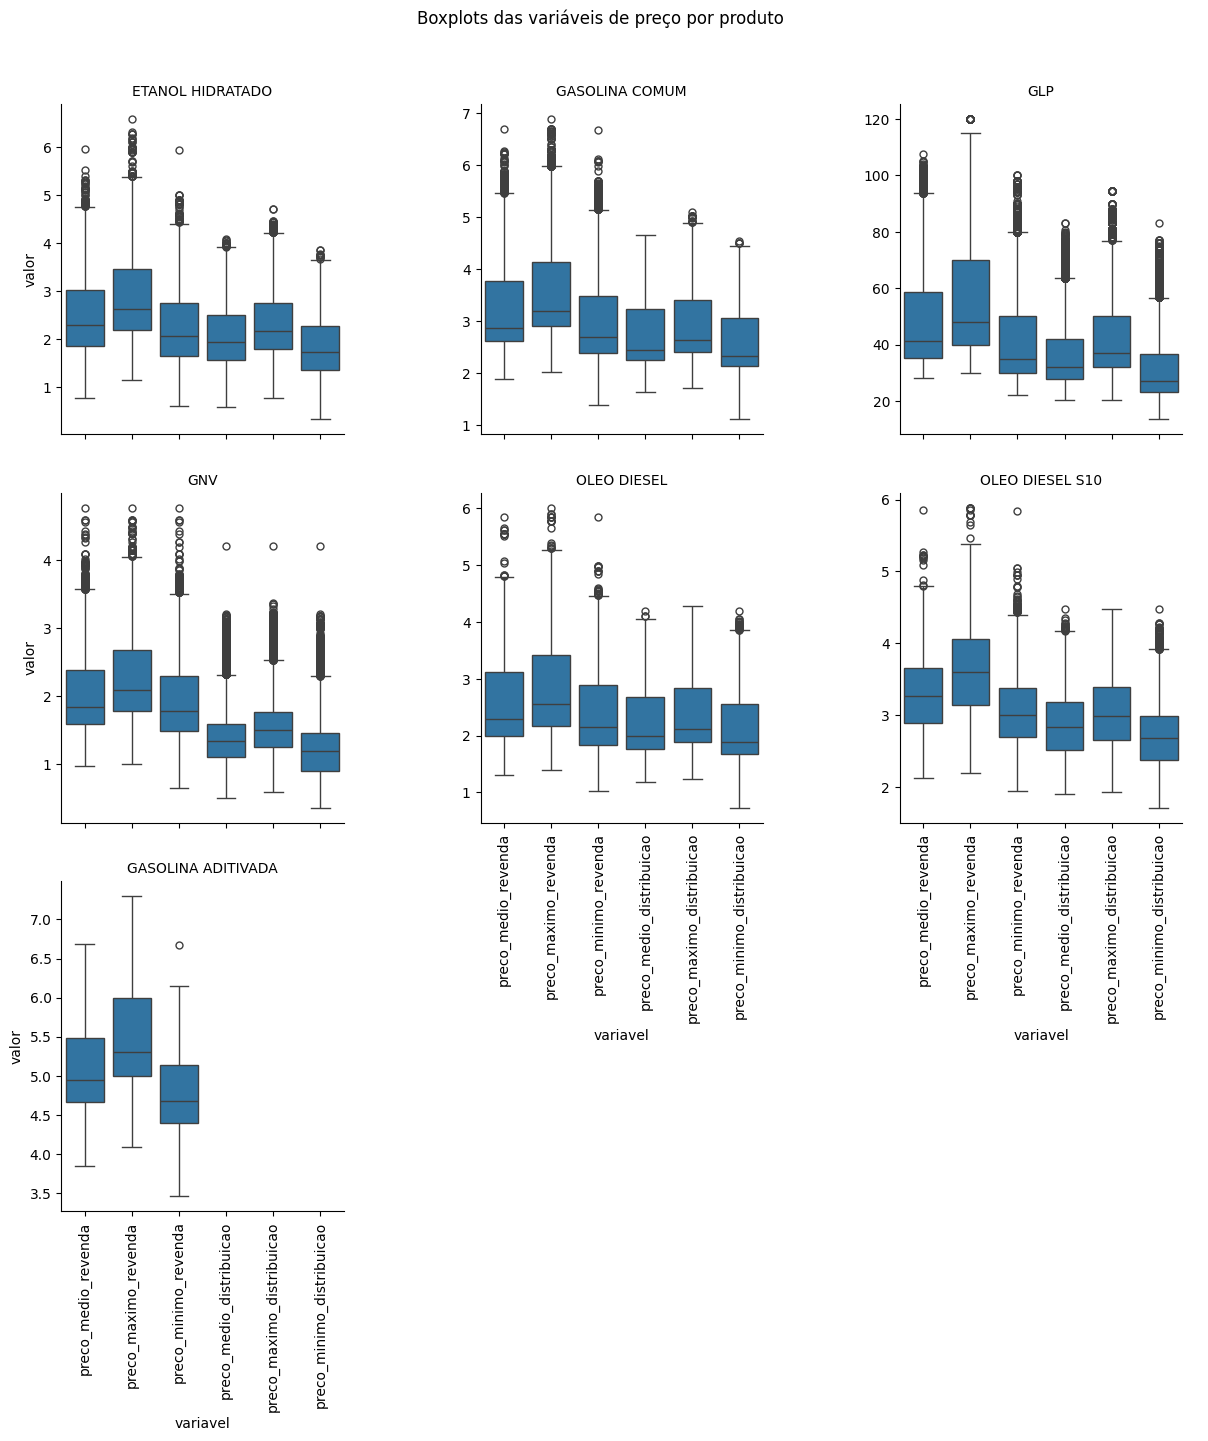

In [83]:
import seaborn as sns

cols_iqr = [
    'preco_medio_revenda', 'preco_maximo_revenda', 'preco_minimo_revenda',
    'preco_medio_distribuicao', 'preco_maximo_distribuicao', 'preco_minimo_distribuicao'
]

df_long_prod = df[cols_iqr + ['produto_normalizado']].melt(
    id_vars='produto_normalizado',
    var_name='variavel',
    value_name='valor'
)

g = sns.catplot(
    data=df_long_prod,
    x='variavel',
    y='valor',
    col='produto_normalizado',
    kind='box',
    col_wrap=3,
    height=4,
    sharey=False
)

g.set_xticklabels(['preco_medio_revenda', 'preco_maximo_revenda', 'preco_minimo_revenda',
    'preco_medio_distribuicao', 'preco_maximo_distribuicao', 'preco_minimo_distribuicao'], rotation=90)
g.set_titles('{col_name}')
g.fig.suptitle('Boxplots das variáveis de preço por produto', y=1.05)

plt.show()

A **análise** dos boxplots **segmentada** por tipo de **produto indica** que os valores identificados como **outliers são plausíveis** e refletem variações reais dos preços ao longo do período de 2004 a 2021 (17 anos).

A **dispersão** dos valores mostrada nos boxplots é **coerente com fatores econômicos** (crises econômicas, mudanças na política de preços da Petrobras, inflação e variações cambiais), **regionais** e **logísticos** (gás GLP é comercializado em botijões e tem forte impacto logístico, com preços chegando a R\$ 100 - R\$ 120).




#### Análise dos outliers por período

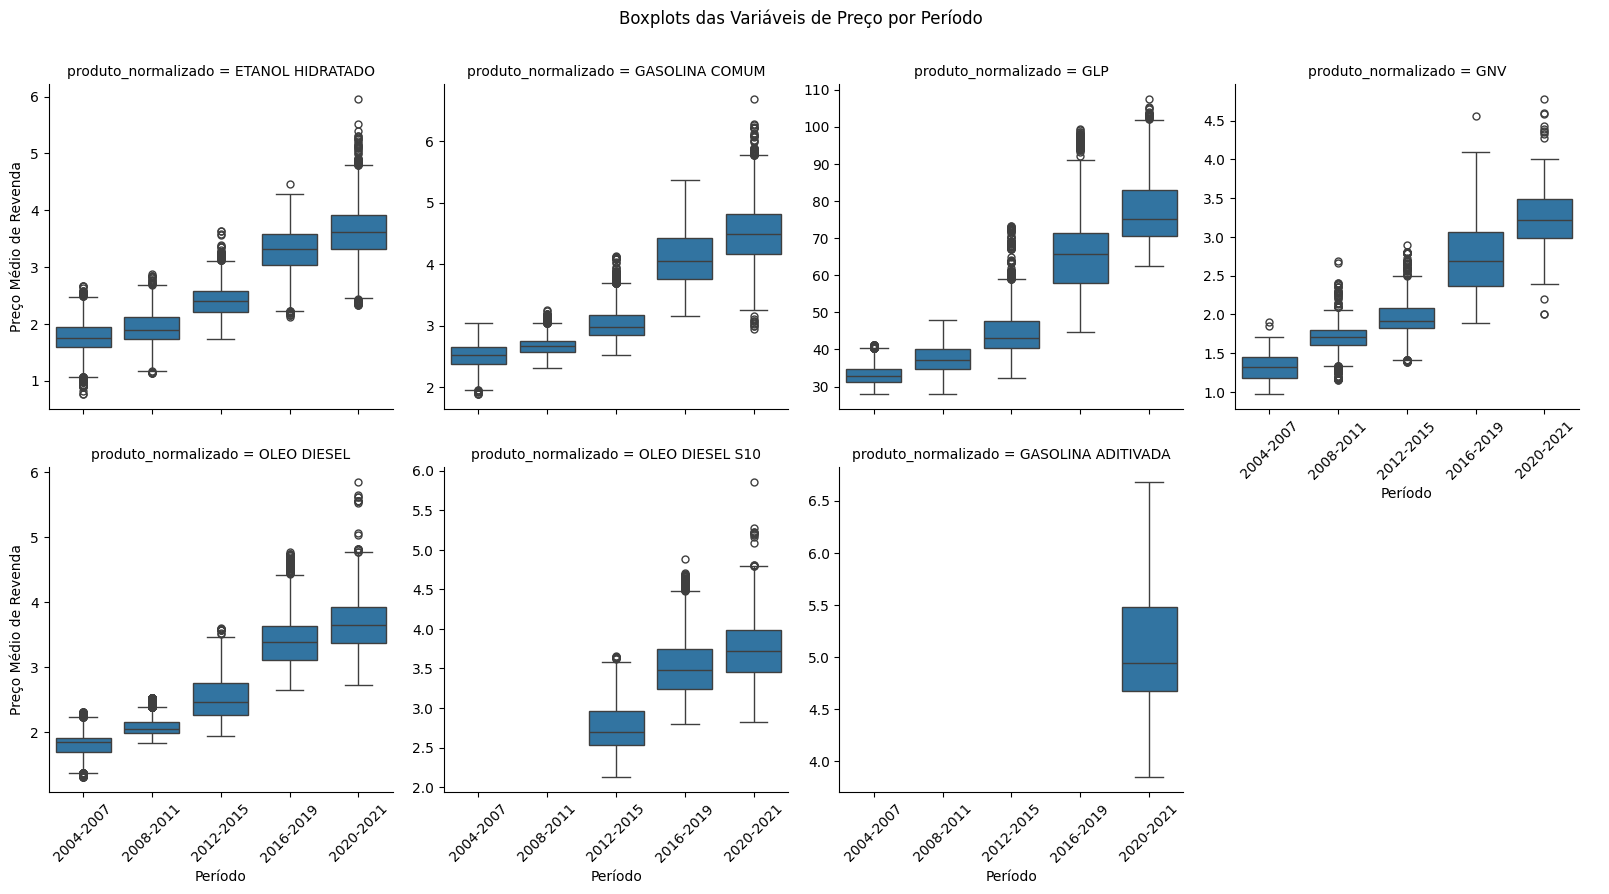

In [59]:
df['periodo'] = pd.cut(
    df['ano'],
    bins = [2003, 2007, 2011, 2015, 2019, 2021],
    labels=['2004-2007', '2008-2011', '2012-2015', '2016-2019', '2020-2021']
)

df['periodo'] = pd.Categorical(
    df['periodo'],
    categories=['2004-2007', '2008-2011', '2012-2015', '2016-2019', '2020-2021'],
    ordered=True
)

g = sns.catplot(
      data=df,
      x='periodo',
      y='preco_medio_revenda',
      col='produto_normalizado',
      kind='box',
      col_wrap=4,
      height=4,
      sharey=False,
      showfliers=True
  )

for ax in g.axes.flatten():
    ax.set_xticks(range(len(df['periodo'].cat.categories)))
    ax.set_xticklabels(
        df['periodo'].cat.categories,
        rotation=45
    )
    ax.set_xlabel('Período')

g.fig.suptitle('Boxplots das Variáveis de Preço por Período', y=1.05)
g.set_axis_labels('Período', 'Preço Médio de Revenda')

plt.show()

Para fazer a **análise** dos boxplots por **período**, foram definidos os seguintes cortes de tempo: **2004-2007**, **2008-2011**, **2012-2015**, **2016-2019**, **2020-2021**.

Os resultados dos boxplots segmentados por períodos de tempo confirmaram os resultados obtidos na análise segmentada por produto.

Os **outliers crescem ao longo do tempo acompanhando os níveis dos preços**, permanecendo **dentro de faixas economicamente plausívei**, consistente com a dinâmica histórica dos preços de combustíveis no Brasil, não caracterizando erros de medição, mas variações econômicas plausíveis.   

Os outliers identificados não foram removidos, pois refletem variações reais associadas ao longo horizonte temporal analisado e a eventos econômicos relevantes, sendo parte do comportamento esperado da série, optando  por preservar a representatividade dos dados.


## Análise Temporal

#### Investigando a gasolina aditivada

A gasolina aditivada só possui registros a partir de 2020 no dataset, o que foi confirmado por uma análise de frequência por ano.

Dessa forma, o produto foi excluído das análises temporais de longo prazo, sendo considerado apenas em análises pontuais para evitar vieses decorrentes de séries incompletas.


In [70]:
pd.crosstab(
    df['produto_normalizado'],
    df['ano']
).loc['GASOLINA ADITIVADA']



,GASOLINA ADITIVADA
ano,
2004,0
2005,0
2006,0
2007,0
2008,0
2009,0
2010,0
2011,0
2012,0


In [125]:
pd.crosstab(
    df['produto_normalizado'],
    df['ano']
).loc['OLEO DIESEL S10']


,OLEO DIESEL S10
ano,
2004,0
2005,0
2006,0
2007,0
2008,0
2009,0
2010,0
2011,0
2012,0


## Análise de tendência de longo prazo

**Objetivo**: identificar o **comportamento de longo prazo** dos preços.

In [85]:
df['ano'] = df['data_final'].dt.year
df['mes'] = df['data_final'].dt.month
df['ano_mes'] = df['data_final'].dt.to_period('M')

Ordenando o dataset em crescente de acordo com a data_final que será utilizada como referência temporal.

In [87]:
df = df.sort_values('data_final')

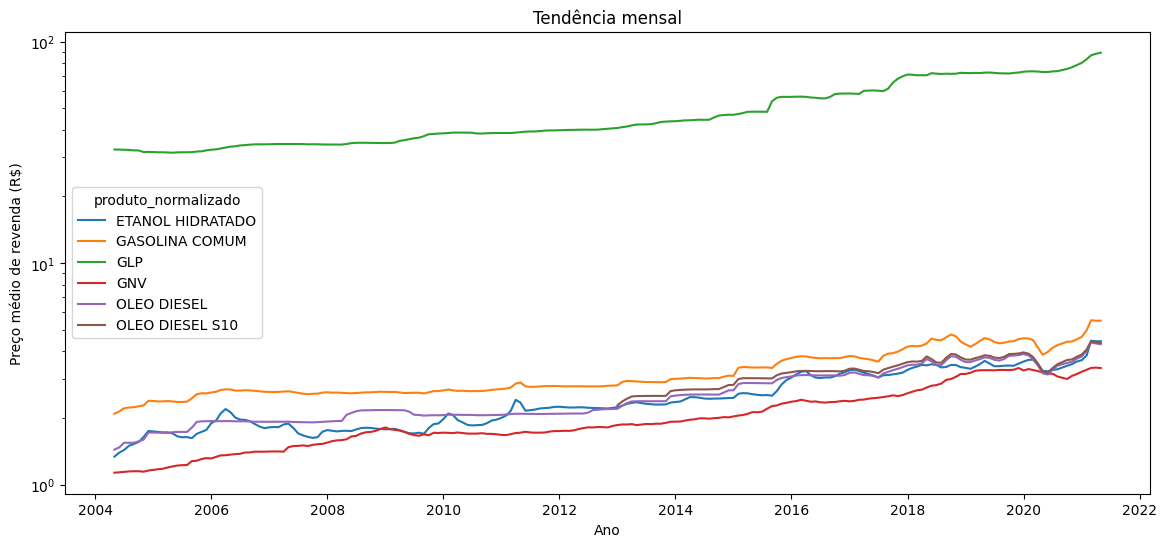

In [153]:
serie_mensal = (
    df[df['produto_normalizado'] != 'GASOLINA ADITIVADA'].groupby(['ano_mes', 'produto_normalizado'])['preco_medio_revenda']
    .mean()
    .reset_index()
)

serie_mensal['ano_mes'] = serie_mensal['ano_mes'].dt.to_timestamp()

plt.figure(figsize=(14,6))
sns.lineplot(
    data=serie_mensal,
    x='ano_mes',
    y='preco_medio_revenda',
    hue='produto_normalizado'
)

plt.yscale("log")
plt.title('Tendência mensal')
plt.xlabel('Ano')
plt.ylabel('Preço médio de revenda (R$)')
plt.show()

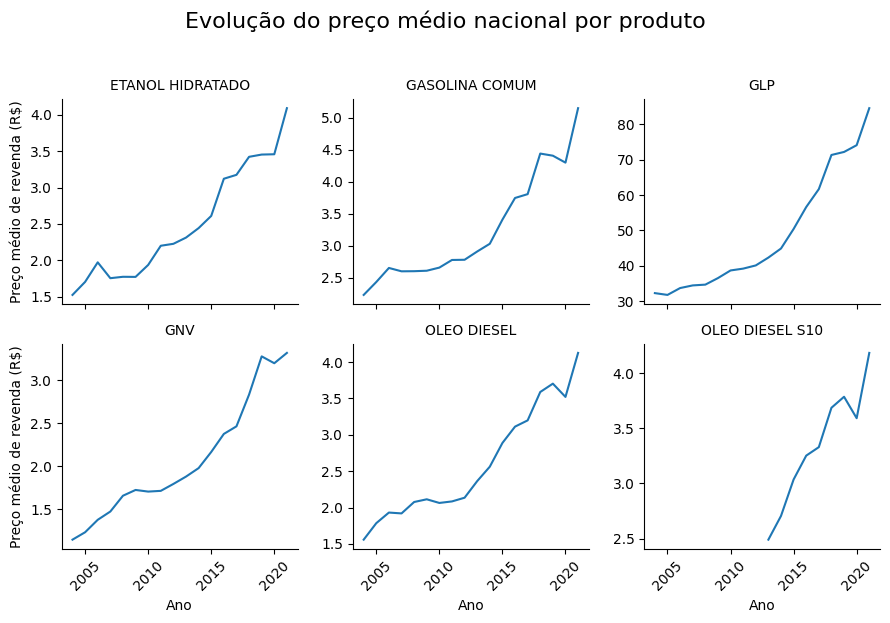

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

serie_produto = (
    df[df['produto_normalizado'] != 'GASOLINA ADITIVADA']
    .groupby(['ano', 'produto_normalizado'])['preco_medio_revenda']
    .mean()
    .reset_index())

# Criar o FacetGrid
g = sns.FacetGrid(
    serie_produto,
    col="produto_normalizado",
    col_wrap=3,
    sharey=False
)

# Mapear a linha de evolução
g.map_dataframe(sns.lineplot, x="ano", y="preco_medio_revenda")

# Ajustar títulos individuais
g.set_titles("{col_name}")

# Ajustar labels dos eixos
g.set_axis_labels("Ano", "Preço médio de revenda (R$)")

# Rotacionar os ticks do eixo x para melhor leitura
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

# Título geral
g.fig.suptitle("Evolução do preço médio nacional por produto", fontsize=16, y=1.03)

plt.tight_layout()
plt.show()


**Principais insights**:

Observa-se uma **tendência geral de aumento dos preços** ao longo do período analisado para todos os combustíveis.

O **GLP** apresenta **valores** significativamente mais **elevados**, enquanto gasolina e diesel apresentam comportamentos semelhantes ao longo do tempo.

**GNV** é o **mais estável**: menor variação ao longo dos anos, com crescimento mais suave.

**Picos em 2021–2022**: gasolina, diesel e etanol dispararam, refletindo crises internacionais e políticas de preços.


## Análise de sazonalidade

**Objetivo**: identificar padrões que se repetem todo ano.

**Pegunta a ser respondida**:


> _Dentro de cada ano, existe um padrão recorrente de meses mais caros ou mais baratos?_



Para esta análise o **ETANOL HIDRATADO** é um bom candidato, uma vez que **depende da safra da cana** no Brasil.



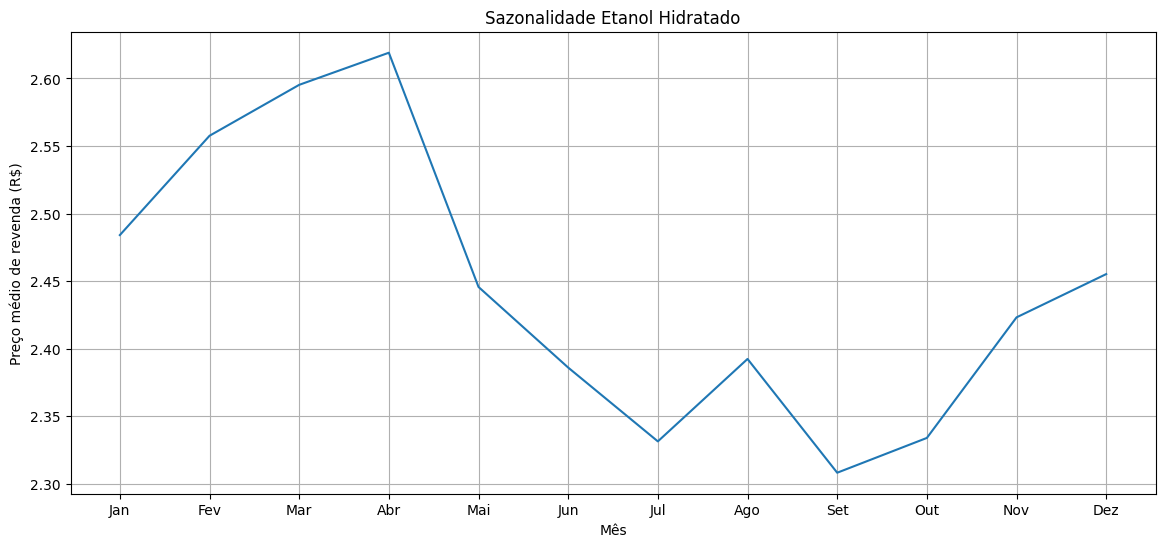

In [109]:

etanol = df[df['produto_normalizado'] == 'ETANOL HIDRATADO']

sazonalidade_etanol = etanol.groupby('mes')['preco_medio_revenda'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(
    data=sazonalidade_etanol,
    x='mes',
    y='preco_medio_revenda'
)

plt.title('Sazonalidade Etanol Hidratado')
plt.xlabel('Mês')
plt.ylabel('Preço médio de revenda (R$)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

#### Média mensal agregada (todos os anos)

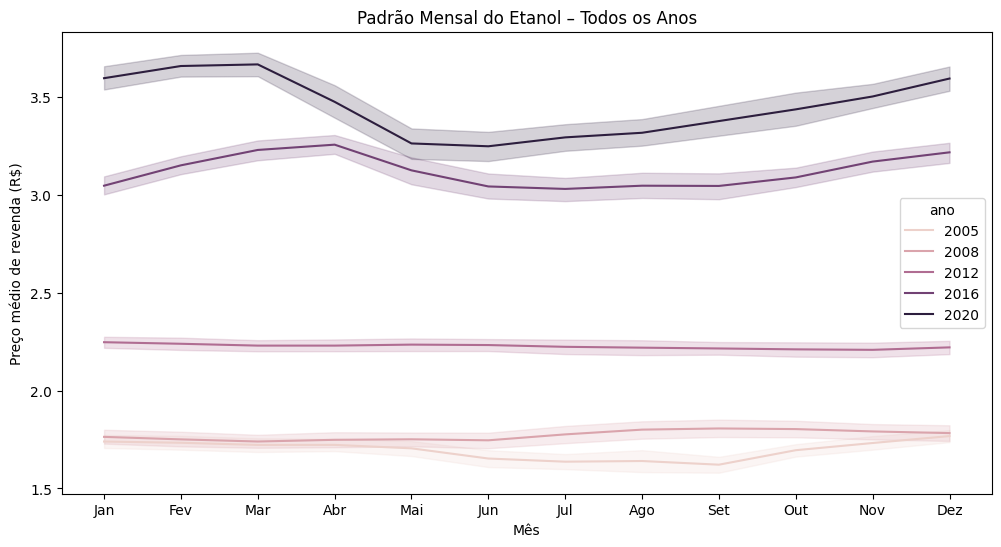

In [118]:
anos_selecionados = [2005, 2008, 2012, 2016, 2020]

df_etanol_filtrado = df[
    (df['produto_normalizado'] == 'ETANOL HIDRATADO') &
    (df['ano'].isin(anos_selecionados))
]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_etanol_filtrado,
    x='mes',
    y='preco_medio_revenda',
    hue='ano'
    #legend=False,
    #alpha=0.2
)

plt.title('Padrão Mensal do Etanol – Todos os Anos')
plt.xlabel('Mês')
plt.ylabel('Preço médio de revenda (R$)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

O **cultivo da cana-de-açúcar no Brasil**, geralmente, **começa em abril ou maio e termina em novembro ou dezembro**, podendo em algumas regiões do país, começar mais cedo, em janeiro ou fevereiro, e terminar mais tarde, em março ou abril do ano seguinte. Fonte: https://armac.com.br/blog/agronegocio/cana-de-acucar/

**Padrões visíveis**:


*   **Alta** no início do ano (**Jan–Mar**) em vários anos
*   **Queda** ou **estabilização** no meio do ano (**Mai–Ago**)
*   **Leve retomada** no final do ano (**Set–Dez**)


Isso faz sentido economicamente para o etanol:


*   **safra da cana** → maior oferta no **meio do ano**
*   **entressafra** → preços sobem no **início / final do ano**


Existe **sazonalidade mensal moderada** no preço do etanol, com **meses iniciais mais caros** (entressafra) e **meses centrais mais baratos** (safra), embora o nível absoluto varie bastante entre os anos.




### Análise de sazonalidade do gás GLP

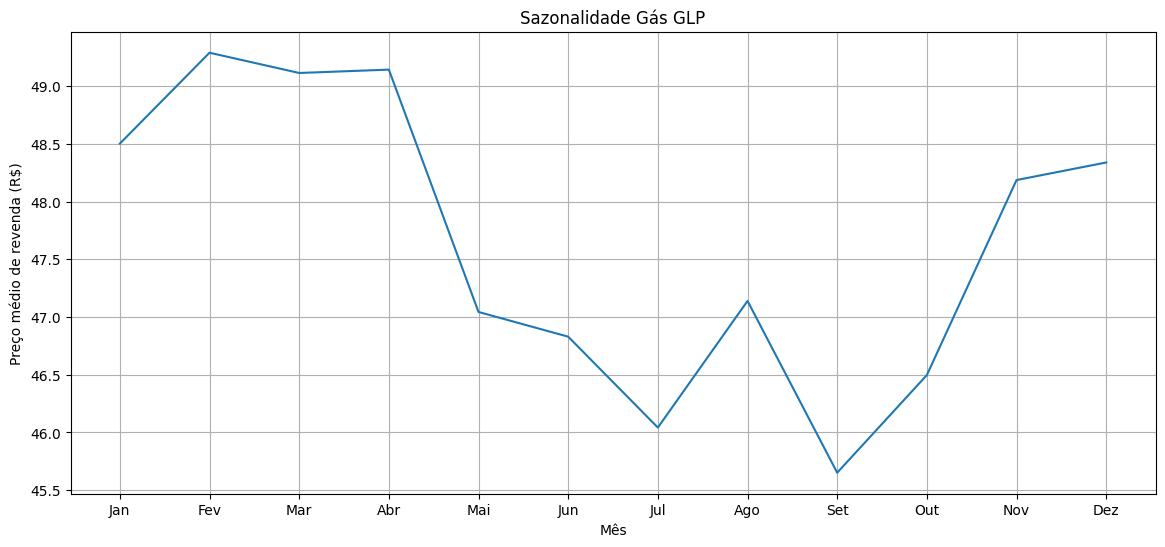

In [110]:

glp = df[df['produto_normalizado'] == 'GLP']

sazonalidade_glp = glp.groupby('mes')['preco_medio_revenda'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(
    data=sazonalidade_glp,
    x='mes',
    y='preco_medio_revenda'
)

plt.title('Sazonalidade gás GLP')
plt.xlabel('Mês')
plt.ylabel('Preço médio de revenda (R$)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

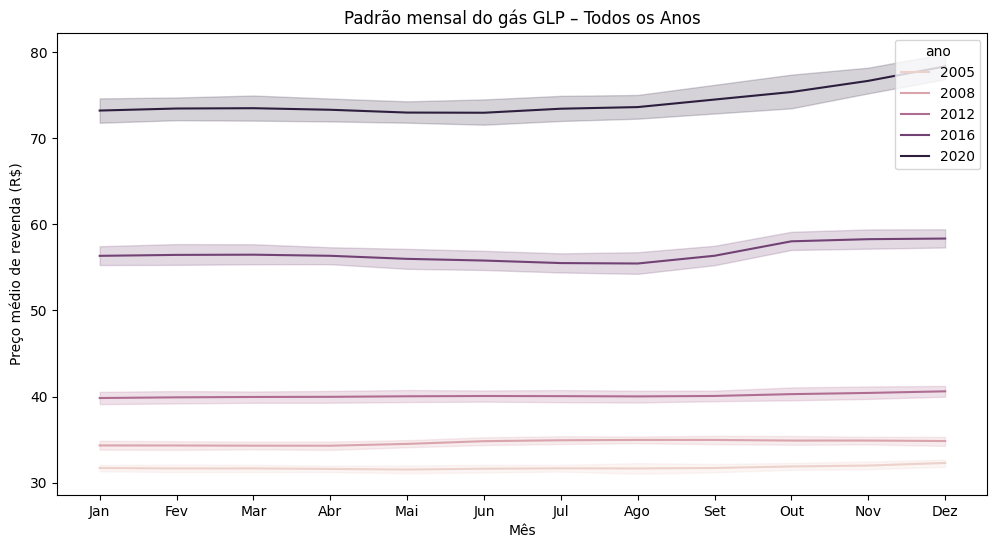

In [119]:
anos_selecionados = [2005, 2008, 2012, 2016, 2020]

df_glp_filtrado = df[
    (df['produto_normalizado'] == 'GLP') &
    (df['ano'].isin(anos_selecionados))
]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_glp_filtrado,
    x='mes',
    y='preco_medio_revenda',
    hue='ano'
    #legend=False,
    #alpha=0.2
)

plt.title('Padrão mensal do gás GLP – Todos os Anos')
plt.xlabel('Mês')
plt.ylabel('Preço médio de revenda (R$)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

De acordo com [Portal GLP](https://portalglp.com.br/preco-do-gas-6-fatores-de-influencia/), os fatores que influenciam os preços do gás são: variações nos preços do petróleo, demanda e oferta sazonal, custos logisticos e localização (regiões mais afastadas dos centros de distribuição elevam o custo da logística), regime fiscal e impostos (ICMS), tipo e tamanho do recipiente (botijões de 13kg, tanques a granel), liver concorrência e volume de compra (regiões com maior concorrência têm preços mais competitivos).  



**Principais insights**:



**Tendência de alta** ao longo dos anos: há um aumento claro nos preços médios do GLP entre 2005 e 2020, refletindo inflação, política de preços da Petrobrás e crises internacionais.

**Sazonalidade pouco pronunciada**: embora haja pequenas variações mensais, o padrão sazonal não é forte nem consistente entre os anos. Isso **sugere** que o GLP tem **baixa sensibilidade à sazonalidade climática**, possivelmente por causa de regulação ou estoques.

Meses de inverno não mostram picos evidentes: junho, julho e agosto não apresentam aumentos significativos em nenhum dos anos analisados, contrariando a expectativa de alta por demanda residencial.

**2020** como ano de **maior preço**: o GLP atinge seus maiores valores em 2020, possivelmente influenciado pela **pandemia**, **alta do dólar** e **reajustes da Petrobras**.



## Comparação de volatilidade entre produtos

**Objetivo**: comparar o **quanto** o **preço** dos produtos **oscila ao longo do tempo**.

**Pergunta a ser respondida**:

> _Em reais, quanto o preço costuma oscilar ao longo do tempo?_



*   Preço **sobe/desce muito** → **alta volatilidade**
*   Preço mais **estável** → **baixa volatilidade**





### Comparando a volatilidade usando desvio padrão (absoluta)

A volatilidade absoluta mostra o quanto os preços variam em termos absolutos.

Exemplo: um desvio padrão de 0,70 R$ significa que os preços mensais oscilam em média 70 centavos em torno da média.

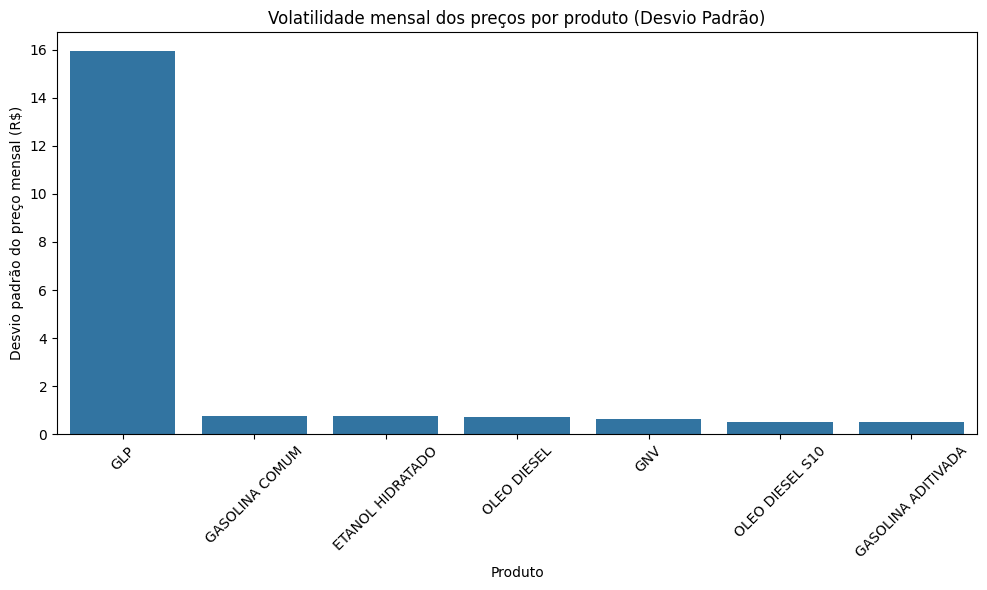

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

volatilidade = (
    df.groupby('produto_normalizado')['preco_medio_revenda']
    .std()
    .reset_index(name='desvio_padrao')
    .sort_values(by='desvio_padrao', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=volatilidade, x='produto_normalizado', y='desvio_padrao')

plt.title('Volatilidade mensal dos preços por produto (Desvio Padrão)')
plt.xlabel('Produto')
plt.ylabel('Desvio padrão do preço mensal (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Removendo o GLP temporariamente

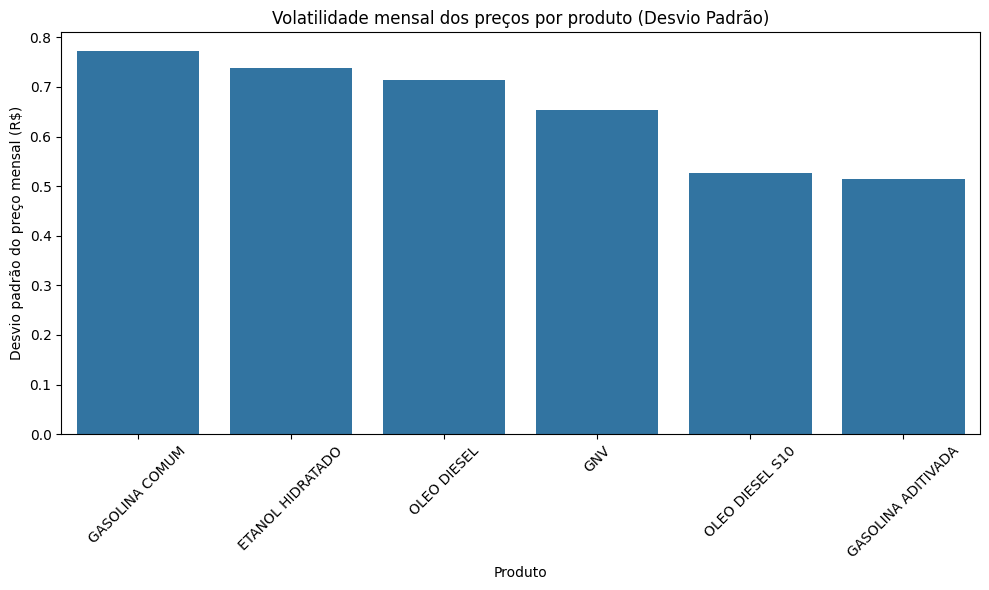

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

volatilidade = (
    df[df['produto_normalizado'] != 'GLP']
    .groupby('produto_normalizado')['preco_medio_revenda']
    .std()
    .reset_index(name='desvio_padrao')
    .sort_values(by='desvio_padrao', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=volatilidade, x='produto_normalizado', y='desvio_padrao')

plt.title('Volatilidade mensal dos preços por produto (Desvio Padrão)')
plt.xlabel('Produto')
plt.ylabel('Desvio padrão do preço mensal (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Principais insights da volatilidade (sem GLP)**

**Gasolina comum** é a **mais volátil entre os líquidos**: com o maior desvio padrão, ela mostra maior sensibilidade a fatores externos como câmbio, petróleo e política de preços.

**Etanol hidratado** também apresenta **alta volatilidade**: isso pode estar ligado à sazonalidade da produção agrícola (safra da cana-de-açúcar) e à concorrência com gasolina.

**Diesel S10** tem volatilidade ligeiramente menor que o diesel comum e junto com a **gasolina aditivada** são os **mais estáveis**, porém, esse resultado  deve ser interpretado com cautela devido à limitação temporal da série, uma vez que, observou-se no dataset que a coleta de dados do Diesel S10 começa apenas a partir do ano 2013 e da gasolina aditivada a partir do ano 2020 e essa redução na janela temporal muito provavelmente está influenciando os valores de volatilidade.

**GNV mostra consistência**, o que pode ser resultado de regulação mais rígida ou menor exposição ao mercado internacional.


### Comparando a volatilidade usando Coeficiente de Variação (relativa)

**Objetivo**: mostrar a volatilidade proporcional ao nível de preço.

Pergunta que esse gráfico responde:

> _Proporcionalmente ao preço médio, qual produto varia mais?_




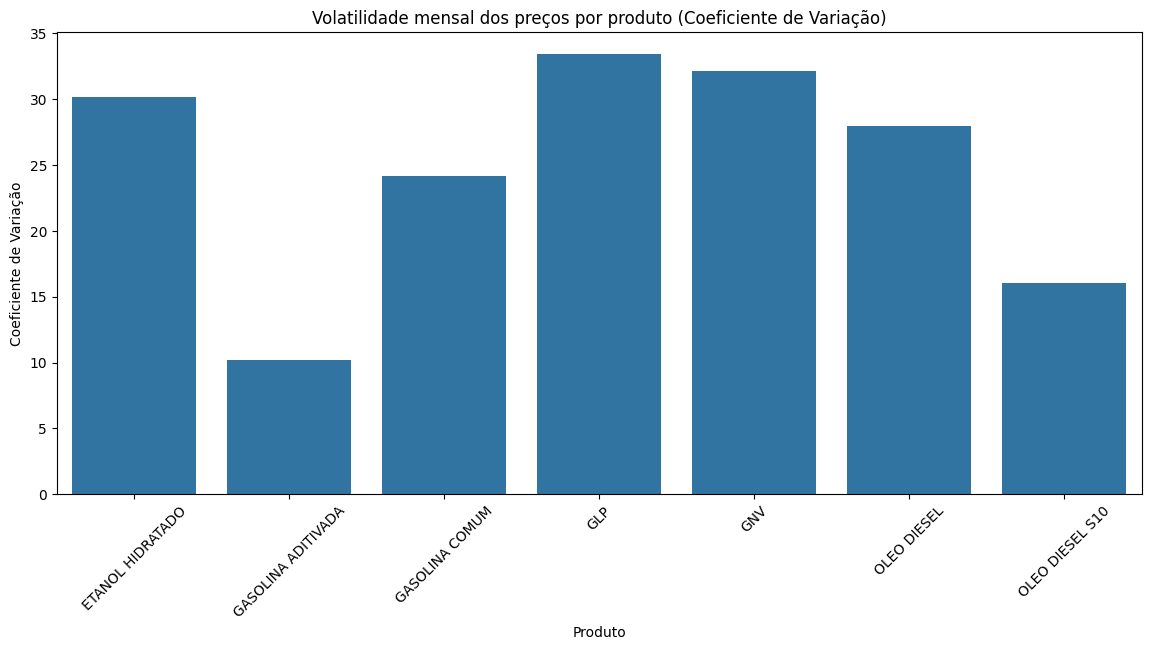

In [130]:
volatilidade_relativa = df.groupby('produto_normalizado')['preco_medio_revenda'].agg(['mean', 'std']).reset_index()
volatilidade_relativa['coef_variacao'] = volatilidade_relativa['std'] / volatilidade_relativa['mean'] * 100

plt.figure(figsize=(14,6))
sns.barplot(
    data=volatilidade_relativa,
    x='produto_normalizado',
    y='coef_variacao'
)

plt.title('Volatilidade mensal dos preços por produto (Coeficiente de Variação)')
plt.xlabel('Produto')
plt.ylabel('Coeficiente de Variação')
plt.xticks(rotation=45)
plt.show()





Ao analisar a volatilidade relativa, observa-se que GLP e GNV apresentam maior instabilidade proporcional de preços, enquanto gasolina aditivada aparenta baixa volatilidade — resultado que, como comentado anteriormente, deve ser interpretado com cautela devido à limitação temporal da série.

## Análise de eventos específicos

**Objetivo**: identificar quebras estruturais que indicam mudanças duradouras.


**O que é uma quebra estrutural?**

Uma mudança significativa, persistente no comportamento da série, como:

*   Novo patamar de preços (preço médio sobe para outro patamar)
*   Mudança de tendência (passa a crescer mais rápido)
*   Aumento brusco de volatilidade










#### Criar média móvel mensal

Ajuda a remover ruídos e destacar mudanças reais.

📌 Janela de 6 meses = boa para capturar mudanças estruturais sem perder tendência.

Foi utilizada uma média móvel de 6 meses com o objetivo de suavizar flutuações de curto prazo e destacar tendências subjacentes, facilitando a identificação visual de possíveis quebras estruturais.

In [128]:

mensal = df.groupby(['ano_mes', 'produto_normalizado'])['preco_medio_revenda'].mean().reset_index()
mensal['ano_mes'] = mensal['ano_mes'].dt.to_timestamp()

mensal = mensal.sort_values(['produto_normalizado', 'ano_mes'])

mensal['media_movel_6m'] = (
    mensal
    .groupby('produto_normalizado')['preco_medio_revenda']
    .transform(lambda x: x.rolling(6).mean())
)


#### Visualizar possíveis quebras

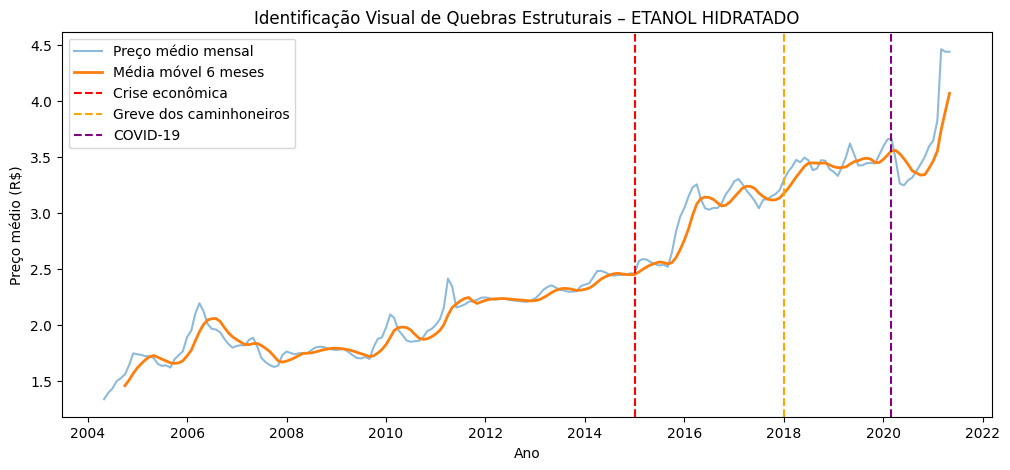

In [129]:
produto = 'ETANOL HIDRATADO'
df_plot = mensal[mensal['produto_normalizado'] == produto]

plt.figure(figsize=(12,5))

plt.plot(df_plot['ano_mes'], df_plot['preco_medio_revenda'],
         label='Preço médio mensal', alpha=0.5)

plt.plot(df_plot['ano_mes'], df_plot['media_movel_6m'],
         label='Média móvel 6 meses', linewidth=2)

plt.axvline(pd.Timestamp('2015-01-01'), color='red', linestyle='--', label='Crise econômica')
plt.axvline(pd.Timestamp('2018-01-01'), color='orange', linestyle='--', label='Greve dos caminhoneiros')
plt.axvline(pd.Timestamp('2020-03-01'), color='purple', linestyle='--', label='COVID-19')

plt.title(f'Identificação Visual de Quebras Estruturais – {produto}')
plt.xlabel('Ano')
plt.ylabel('Preço médio (R$)')
plt.legend()
plt.show()


**Principais insights**:


A análise da média móvel de 6 meses do preço do etanol hidratado evidencia mudanças relevantes no comportamento da série ao longo do tempo.

Observa-se uma aceleração da tendência de alta a partir de 2015, intensificada após 2020, período associado à pandemia de COVID-19.

Diferentemente de choques temporários, como a greve dos caminhoneiros em 2018, o pós-2020 apresenta um novo patamar de preços, sugerindo a ocorrência de uma quebra estrutural mais persistente.

### Gasolina comum

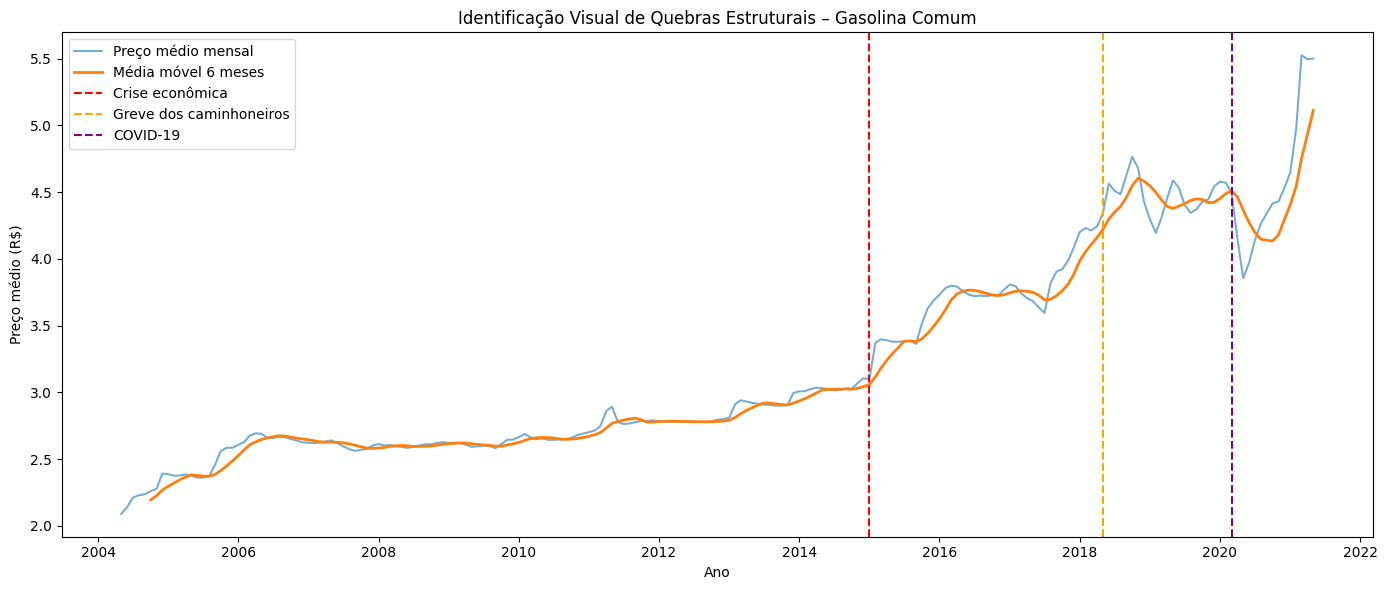

In [ ]:
# Filtrar gasolina comum
df_gc = df[df['produto_normalizado'] == 'GASOLINA COMUM'].copy()

# Agregar para média mensal nacional
gc_mensal = (
    df_gc
    .groupby(df_gc['data_final'].dt.to_period('M'))['preco_medio_revenda']
    .mean()
    .reset_index()
)

gc_mensal['data'] = gc_mensal['data_final'].dt.to_timestamp()

# Média móvel 6 meses
gc_mensal['mm_6'] = gc_mensal['preco_medio_revenda'].rolling(window=6).mean()

# Plot
plt.figure(figsize=(14,6))

plt.plot(gc_mensal['data'], gc_mensal['preco_medio_revenda'],
         label='Preço médio mensal', alpha=0.6)

plt.plot(gc_mensal['data'], gc_mensal['mm_6'],
         label='Média móvel 6 meses', linewidth=2)

# Eventos
plt.axvline(pd.to_datetime('2015-01-01'), color='red', linestyle='--', label='Crise econômica')
plt.axvline(pd.to_datetime('2018-05-01'), color='orange', linestyle='--', label='Greve dos caminhoneiros')
plt.axvline(pd.to_datetime('2020-03-01'), color='purple', linestyle='--', label='COVID-19')

plt.title('Identificação Visual de Quebras Estruturais – Gasolina Comum')
plt.xlabel('Ano')
plt.ylabel('Preço médio (R$)')
plt.legend()
plt.tight_layout()
plt.show()


**Principais insights**:

Assim como o etanol hidratado, a gasolina comum mostra uma mudança de inclinação após 2015, com aumento temporário em 2018 e quebra estrutural clara após 2020, evidenciando novos patamares de preços.




### Análise Geográfica de Preços de Combustíveis

Esta análise tem como objetivo responder às seguintes perguntas:


> _Quais UFs e Regiões têm preços consistentemente mais altos ou mais baixos?_


> _Essas diferenças são persistentes ou mudam ao longo do tempo?_



> _Há convergência (preços ficando mais parecidos) ou divergência regional?_


Para isso serão observados:


*   Nível de preço → média
*   Dispersão regional → quão diferentes são os preços entre UFs
*   Convergência → diferenças diminuem ao longo do tempo
*   Divergência → diferenças aumentam ao longo do tempo









In [132]:
display(df['regiao'].unique())
display('-------------------------------')
display(df['estado'].unique())

array(['CENTRO OESTE', 'SUL', 'SUDESTE', 'NORTE', 'NORDESTE'],
      dtype=object)

'-------------------------------'

array(['DISTRITO FEDERAL', 'SANTA CATARINA', 'GOIAS', 'RIO GRANDE DO SUL',
       'PARANA', 'SAO PAULO', 'RIO DE JANEIRO', 'MINAS GERAIS',
       'ESPIRITO SANTO', 'TOCANTINS', 'RONDONIA', 'PARA', 'AMAZONAS',
       'AMAPA', 'ACRE', 'SERGIPE', 'RIO GRANDE DO NORTE', 'PIAUI',
       'PERNAMBUCO', 'RORAIMA', 'PARAIBA', 'MATO GROSSO',
       'MATO GROSSO DO SUL', 'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO'],
      dtype=object)

#### Comparação de preços por UF

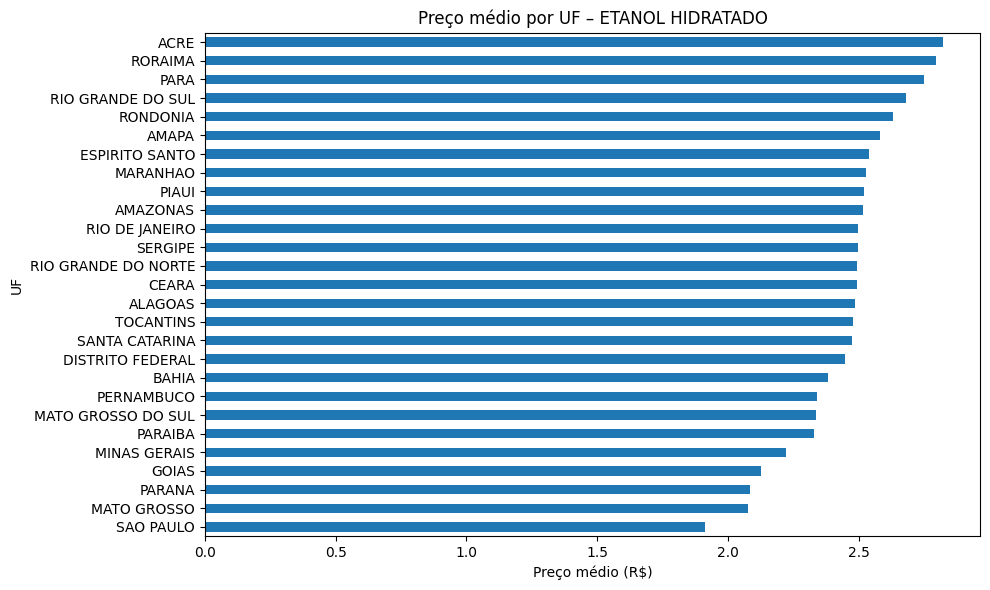

In [133]:
produto = 'ETANOL HIDRATADO'

uf_preco = (
    df[df['produto_normalizado'] == produto]
    .groupby('estado')['preco_medio_revenda']
    .mean()
    .sort_values()
)

plt.figure(figsize=(10,6))
uf_preco.plot(kind='barh')
plt.title(f'Preço médio por UF – {produto}')
plt.xlabel('Preço médio (R$)')
plt.ylabel('UF')
plt.tight_layout()
plt.show()


#### Comparação de preços por região

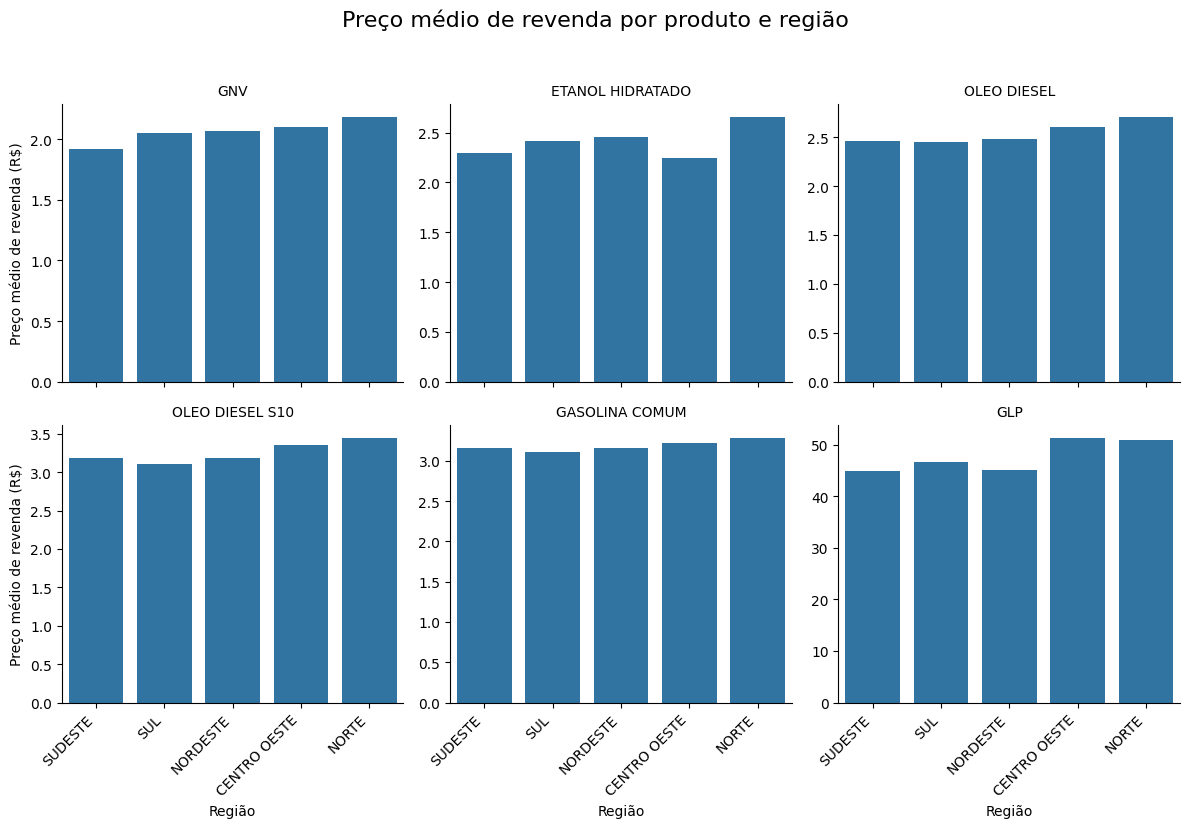

In [139]:

regiao_mensal = (
    df[df['produto_normalizado'] != 'GASOLINA ADITIVADA']
    .groupby(['regiao', 'produto_normalizado'])['preco_medio_revenda']
    .mean()
    .reset_index()
    .sort_values(by='preco_medio_revenda')
)



g = sns.FacetGrid(regiao_mensal, col='produto_normalizado', col_wrap=3, height=4, sharey=False)

g.map_dataframe(sns.barplot, x='regiao', y='preco_medio_revenda')


# Títulos individuais (por produto)
g.set_titles('{col_name}')


# Labels dos eixos
g.set_axis_labels('Região', 'Preço médio de revenda (R$)')

# Rotacionar os nomes das regiões no eixo x
  # plt.setp() garante que os rótulos sejam rotacionados corretamente
for ax in g.axes.flat:
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Título do gráfico
g.fig.suptitle('Preço médio de revenda por produto e região', fontsize=16, y=1.03)

# ajuda a evitar sobreposição entre os subplots e o título.
plt.tight_layout()

plt.show()


Observa-se que as regiões Norte e Centro-Oeste tendem a apresentar preços médios mais elevados para a maioria dos combustíveis, enquanto Sul e Sudeste aparecem frequentemente entre as regiões com menores preços médios, embora o ranking varie conforme o produto

### Evolução do preço médio por região

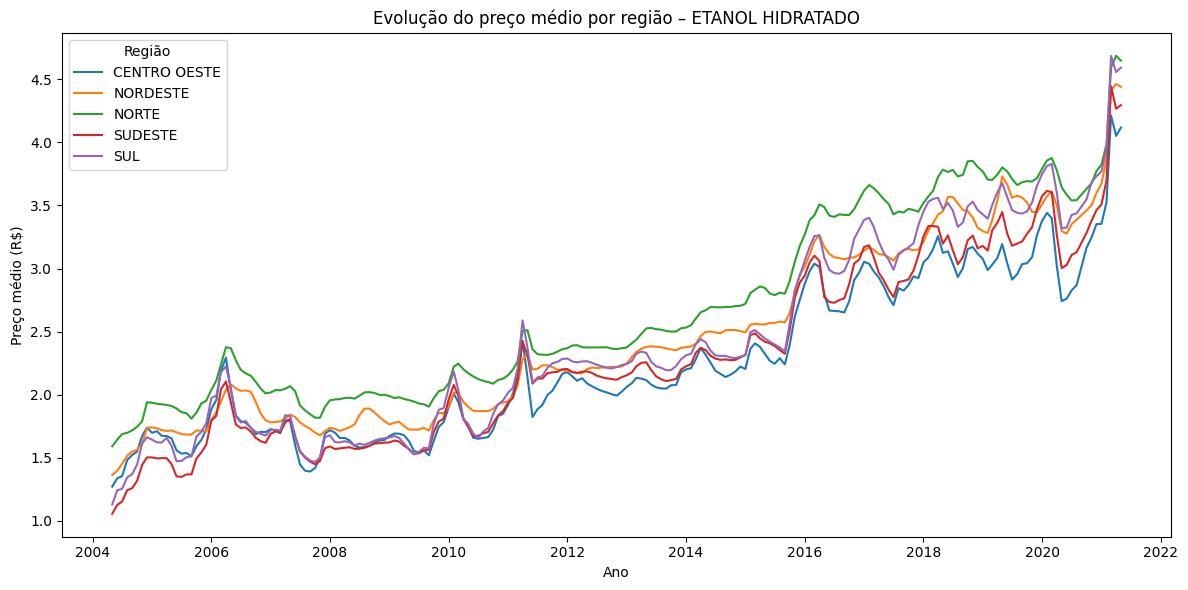

In [149]:
# Permite observar a evolução do preço médio por região por produto
produto = 'ETANOL HIDRATADO'

df['ano_mes'] = df['data_final'].dt.to_period('M')

mensal_regiao = (
    df[df['produto_normalizado'] == produto]
    .groupby(['ano_mes', 'regiao'])['preco_medio_revenda']
    .mean()
    .reset_index()
)

mensal_regiao['ano_mes'] = mensal_regiao['ano_mes'].dt.to_timestamp()

plt.figure(figsize=(12,6))

sns.lineplot(
    data=mensal_regiao,
    x='ano_mes',
    y='preco_medio_revenda',
    hue='regiao'
)

plt.title(f'Evolução do preço médio por região – {produto}')
plt.xlabel('Ano')
plt.ylabel('Preço médio (R$)')
plt.legend(title='Região')
plt.tight_layout()
plt.show()


**Principais insights**:

A análise geográfica revela diferenças persistentes de preços entre as Unidades Federativas e regiões do Brasil.

De forma geral, as regiões Norte e Nordeste apresentam preços médios mais elevados, enquanto Sudeste e Sul concentram os menores valores.


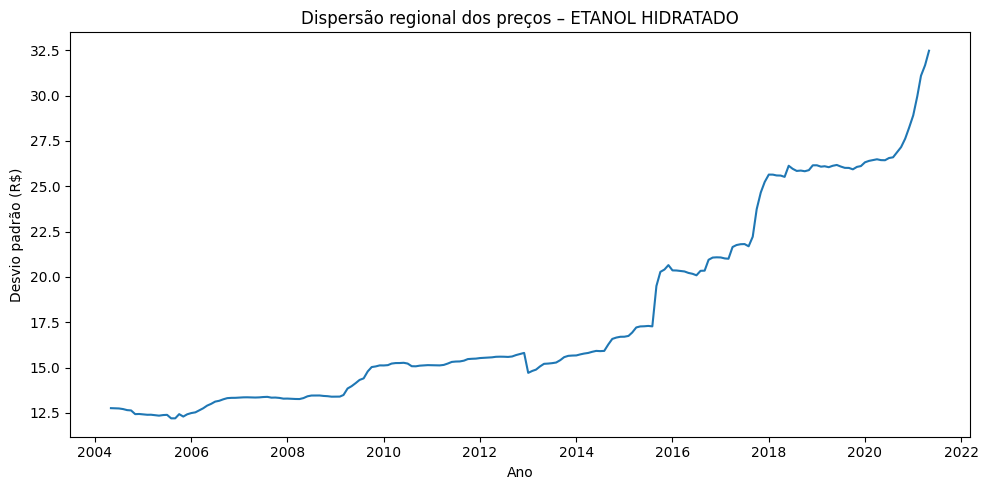

In [142]:
dispersao = (
    mensal_regiao
    .groupby('ano_mes')['preco_medio_revenda']
    .std()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(dispersao['ano_mes'], dispersao['preco_medio_revenda'])
plt.title(f'Dispersão regional dos preços – {produto}')
plt.xlabel('Ano')
plt.ylabel('Desvio padrão (R$)')
plt.tight_layout()
plt.show()


#### Convergência vs Divergência


*   Desvio padrão caindo → convergência

*   Desvio padrão subindo → divergência



Oscilações → choques externos afetando regiões de forma desigual


A análise temporal indica períodos de convergência regional, especialmente em momentos de estabilidade econômica, e divergência durante choques externos, como crises econômicas e eventos logísticos.

A análise da dispersão regional dos preços do etanol hidratado indica um processo de divergência regional crescente a partir de 2016, com aumento significativo das diferenças de preços entre regiões, especialmente durante períodos de choques econômicos e logísticos

## Análise da amostra

**Objetivo**: avaliar se o número de postos pesquisados varia
significativamente entre as UFs e discutir como essa variação pode introduzir vieses nas médias de preços calculadas.

**Por que isso importa?**


UFs com poucos postos:

*   São mais sensíveis a outliers
*   Podem não representar bem o mercado local
*   Podem distorcer comparações regionais ou nacionais


In [ ]:
print(f"Número de UFs distintas: {df['estado'].nunique()}")
print(df['estado'].unique())


Número de UFs distintas: 27
['DISTRITO FEDERAL' 'SANTA CATARINA' 'GOIAS' 'RIO GRANDE DO SUL' 'PARANA'
 'SAO PAULO' 'RIO DE JANEIRO' 'MINAS GERAIS' 'ESPIRITO SANTO' 'TOCANTINS'
 'RONDONIA' 'PARA' 'AMAZONAS' 'AMAPA' 'ACRE' 'SERGIPE'
 'RIO GRANDE DO NORTE' 'PIAUI' 'PERNAMBUCO' 'RORAIMA' 'PARAIBA'
 'MATO GROSSO' 'MATO GROSSO DO SUL' 'ALAGOAS' 'BAHIA' 'CEARA' 'MARANHAO']


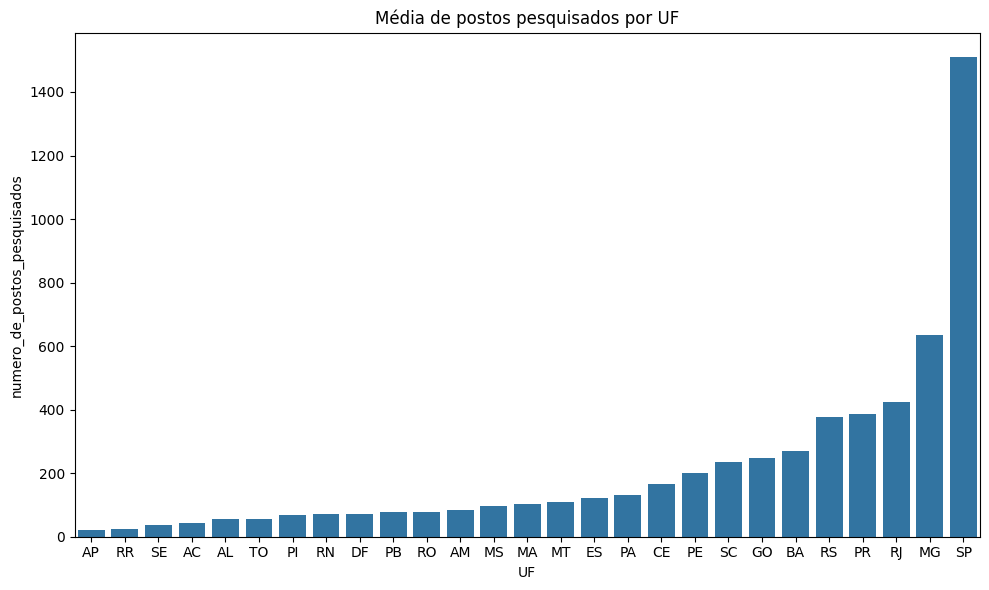

In [131]:
# Dicionário de mapeamento: nome completo -> sigla
mapa_uf = { 'DISTRITO FEDERAL':'DF',  'SANTA CATARINA':'SC', 'GOIAS':'GO', 'RIO GRANDE DO SUL':'RS', 'PARANA':'PR',
 'SAO PAULO':'SP',  'RIO DE JANEIRO':'RJ', 'MINAS GERAIS':'MG', 'ESPIRITO SANTO':'ES', 'TOCANTINS':'TO',
 'RONDONIA':'RO', 'PARA':'PA',  'AMAZONAS':'AM', 'AMAPA':'AP', 'ACRE':'AC', 'SERGIPE':'SE',
 'RIO GRANDE DO NORTE':'RN', 'PIAUI': 'PI', 'PERNAMBUCO':'PE', 'RORAIMA':'RR', 'PARAIBA':'PB',
 'MATO GROSSO':'MT', 'MATO GROSSO DO SUL':'MS', 'ALAGOAS':'AL', 'BAHIA':'BA', 'CEARA':'CE', 'MARANHAO':'MA' }

postos_por_uf = (
    df.groupby('estado')['numero_de_postos_pesquisados']
    .mean()
    .sort_values()
    .reset_index()
)

postos_por_uf['uf'] = postos_por_uf['estado'].map(mapa_uf)


plt.figure(figsize=(10,6))

sns.barplot(data=postos_por_uf, x='uf', y='numero_de_postos_pesquisados')
plt.title('Média de postos pesquisados por UF')
plt.xlabel('UF')

plt.tight_layout()
plt.show()


Pelo gráfico é possível perceber uma **forte desigualdade amostral** entre as UFs.



*   **SP** conta com uma média de 1500 postos pesquisados
*   **MG**, **RJ**, **PR** e **RS** também têm amostras muito grandes
*   Estados do **Norte** (AP, AC, RO, RR, AM) têm amostras muito pequenas (20-80 postos).



**Principais insights**:

Observa-se uma grande heterogeneidade no número médio de postos pesquisados entre as Unidades Federativas.

Estados como São Paulo, Minas Gerais e Rio de Janeiro apresentam amostras significativamente maiores, enquanto UFs da região Norte possuem cobertura bastante reduzida.

Essa desigualdade pode introduzir vieses na comparação direta de preços, uma vez que médias calculadas a partir de poucas observações são mais sensíveis a variações pontuais e menos representativas do mercado local.

Assim, resultados para UFs com baixa amostragem devem ser interpretados com cautela.


**Possíveis estratégias de mitigação**



*   **Uso de médias ponderadas** pelo número de postos
*   **Definição de um mínimo de postos** para comparações entre UFs
*   **Análises em nível regional**, reduzindo assimetria









## Relatório da análise

**Principais insights e conclusões**

A análise dos preços de combustíveis no Brasil revelou padrões relevantes nas dimensões temporal, geográfica e amostral.

Do ponto de vista temporal, observou-se uma **tendência** geral de **crescimento dos preços** ao longo dos anos para todos os produtos analisados, com intensificação em períodos associados a choques econômicos e institucionais.

A análise de **sazonalidade** indicou que o etanol hidratado apresenta comportamento sazonal moderado, relacionado à safra de produção da cana-de-açúcar.

A comparação de **volatilidade** entre os produtos evidenciou diferenças importantes no grau de variação dos preços.

O GLP apresentou maior **volatilidade absoluta**, enquanto a análise relativa, por meio do coeficiente de variação, permitiu uma comparação mais adequada entre combustíveis com escalas de preço distintas.

Na **dimensão geográfica**, foram identificadas **diferenças persistentes** de **preços médios entre regiões** e Unidades Federativas (UFs), com alguns estados apresentando níveis consistentemente mais altos ou mais baixos ao longo do tempo, sugerindo que fatores logísticos, tributários e estruturais influenciam a formação de preços.

Além disso, a **análise da amostr** mostrou uma **forte heterogeneidade** no **número de postos pesquisados entre as UFs**, com concentração da coleta em estados mais populosos.

De forma geral, os resultados indicam que o **comportamento** dos **preços** dos combustíveis é **influenciado** por uma combinação de **fatores temporais**, **regionais** e **estruturais**, sendo necessário levá-los em consideração para uma melhor compreensão do comportamento desse mercado.

b. Limitações do estudo

Algumas limitações devem ser consideradas na interpretação dos resultados. Em primeiro lugar, a qualidade e a cobertura dos dados variam ao longo do tempo e entre as Unidades Federativas, o que pode afetar a comparabilidade das séries históricas. Determinados produtos apresentam dados incompletos em períodos mais antigos, o que exigiu recortes temporais e pode ter reduzido a profundidade de algumas análises.

Além disso, a variação significativa no número de postos pesquisados entre as UFs introduz potenciais vieses amostrais. Estados com poucos postos na amostra podem ter médias de preços menos representativas, tornando comparações diretas com estados de grande cobertura mais sujeitas a distorções. Outro ponto relevante é que a análise se baseia em preços médios, que podem mascarar a dispersão interna dos preços dentro de uma mesma UF ou região.

Por fim, a identificação de eventos externos e quebras estruturais foi realizada de forma exploratória e descritiva, sem a aplicação de testes estatísticos formais, o que limita conclusões causais mais robustas.

c. Sugestões de próximos passos

Como aprofundamentos futuros, recomenda-se a aplicação de métodos estatísticos formais para detecção de quebras estruturais. Também seria relevante incorporar técnicas de ponderação das médias de preços com base no número de postos pesquisados, reduzindo o impacto de vieses amostrais.

Outras extensões possíveis incluem a modelagem de séries temporais para previsão de preços, utilizando abordagens como ARIMA, Prophet ou modelos baseados em aprendizado de máquina. A inclusão de variáveis externas, como preços internacionais do petróleo, câmbio e políticas tributárias, poderia enriquecer a análise explicativa.

Por fim, análises mais granulares, em nível municipal ou por bandeira de posto, podem fornecer uma compreensão ainda mais detalhada da dinâmica de preços dos combustíveis no Brasil.




